# **"General" Evolutionary Algorithm**

```python
def evolutionary_algorithm():
    'Pseudocode of an evolutionary algorithm'    
    populations = [] # a list with all the populations
    
    populations[0] =  initialize_population(pop_size)
    t = 0
    
    while not stop_criterion(populations[t]):
        fitnesses = evaluate(populations[t])
        offspring = matting_and_variation(populations[t],
                                          fitnesses)
        populations[t+1] = environmental_selection(           
                                          populations[t],
                                          offspring)
        t = t+1
```

# **Distributed Evolutionary Algorithms in Python (DEAP)**

<table>
<tr>
<td width='47%'>
<img src='https://raw.githubusercontent.com/DEAP/deap/master/doc/_static/deap_long.png' title="DEAP logo" width='40%' align='center'/>
</td>
</tr>
</table>

# **The One Max problem**

* Maximize the number of ones in a binary string (list, vector, etc.).
* More formally, from the set of binary strings of length $n$,
$$\mathcal{S}=\left\{b_1,\ldots,b_m\right\}, \text{ with } b_i=\left\{s_{i1}, \ldots, s_{in}\right\} \text{ | } s_{ij}=\left\{0,1\right\}$$
* Find $b^\ast\in\mathcal{S}$ such that
$$b_l = \operatorname*{arg\,max}_{s\in\mathcal{b_l}} \sum_{j=1}^{n}{s_{lj}}.$$
* Its clear that the optimum is an *all-ones* string.

## **Coding the problem**

In [1]:
%%bash
pip install git+https://github.com/DEAP/deap@master

  Cloning https://github.com/DEAP/deap (to revision master) to /tmp/pip-req-build-25wfu1vf
  Created wheel for deap: filename=deap-1.3.1-cp37-cp37m-linux_x86_64.whl size=138898 sha256=3adec2baf01b92d72ea070a71e6a5fa143a764c047aa883dda03200c6e932317
  Stored in directory: /tmp/pip-ephem-wheel-cache-ggznv8_3/wheels/37/08/2d/1c69bd05c785b5f651d23680921059342b69b7f3ec0d724ea7
Successfully built deap


  Running command git clone -q https://github.com/DEAP/deap /tmp/pip-req-build-25wfu1vf


In [11]:
import random
import numpy as np
from deap import algorithms, base, creator, tools

In [3]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

In [4]:
def evalOneMax(individual):
  return (sum(individual),)

# **Defining elements**

In [5]:
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=100)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [6]:
# https://deap.readthedocs.io/en/master/api/tools.html
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# **Running experiment**

In [7]:
pop = toolbox.population(n=300)
result = algorithms.eaSimple(pop, toolbox, cxpb = 0.5, mutpb=0.2, ngen=10, verbose=False)

```python
evaluate(population)
for g in range(ngen):
    population = select(population, len(population))
    offspring = varAnd(population, toolbox, cxpb, mutpb)
    evaluate(offspring)
    population = offspring
```

In [8]:
print('Current best fitness:', evalOneMax(tools.selBest(pop, k=1)[0]))

Current best fitness: (80,)


In [9]:
result = algorithms.eaSimple(pop, toolbox, cxpb = 0.5, mutpb=0.2, ngen=50, verbose=False)

In [10]:
print('Current best fitness:', evalOneMax(tools.selBest(pop, k=1)[0]))

Current best fitness: (99,)


# **Statistics**

In [12]:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)

In [13]:
pop = toolbox.population(n=300)
pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb = 0.5, mutpb=0.2, ngen=50, 
                             stats=stats, verbose=False)

In [14]:
gen = logbook.select("gen")
fit_min = logbook.select("min")
fit_avg = logbook.select("avg")

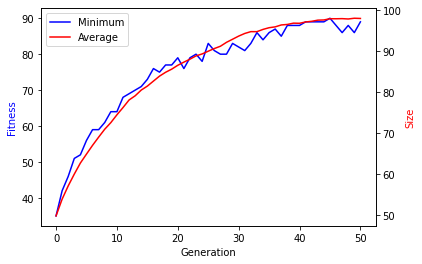

In [16]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
line1 = ax1.plot(gen, fit_min, "b", label="Minimum")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")

ax2 = ax1.twinx()
line2 = ax2.plot(gen, fit_avg, "r", label="Average")
ax2.set_ylabel("Size", color="r")

lns = line1 + line2
labs = ['Minimum', 'Average']
ax1.legend(lns, labs)

plt.show()